In [1]:
import numpy as np
import matplotlib.pyplot as plt

def graficar(f, x_i, x_f, num=1000):
    #plt.style.use("seaborn-v0_8-darkgrid")
    """
    Gráfica de funciones algebraicas
    :param f: función, previamente definida
    :param x_i: límite inferior del intervalo
    :param x_f: límite superior del intervalo
    :param num: división del intervalo
    :return: gráfica de la función
    """
    x = np.linspace(x_i, x_f, num)
    fig, ax = plt.subplots(figsize=(20, 8))
    ax.plot(x, f(x))
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin),
                arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    plt.show()
    return None

def metodo_biseccion(f, a, b, tol=1e-4, num=100, verbose=2):
    if (f(a)*f(b)>=0):
        if verbose==1:
            print('El método no funciona, error en los intervalos')
        return None
    n = 1
    while n <= num:
        p_i = (a + b)/2
        if verbose==1:
            print(f'ite:{n}, a:{a:.5f}, b:{b:.5f}, p_{n}:{p_i:.5f}')
        if f(p_i) == 0:
            if verbose==1:
                print(f'Solución exacta encontrada: {p_i}')
            return p_i
        error = abs(b - a)
        if error <= tol:
            if verbose==2:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i

        if (f(a)*f(p_i) < 0):
            b = p_i
        else:
            a = p_i
        n += 1
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

def metodo_regulafalsi(f, a, b, tol=1e-4, num=100, verbose=2):
    if (f(a)*f(b)>=0):
        if verbose==1:
            print('El método no funciona, error en los intervalos')
        return None
    n = 1
    p_0 = a
    while n <= num:
        p_i = a - f(a)*((b-a)/(f(b) - f(a)))
        if verbose==1:
            print(f'ite:{n}, a:{a:.9f}, b:{b:.9f}, p_{n}:{p_i:.9f}')
        if f(p_i) == 0:
            if verbose==1:
                print(f'Solución exacta encontrada: {p_i}')
            return p_i
        error = abs(p_i - p_0)
        if error <= tol:
            if verbose==2:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i

        if (f(a)*f(p_i) < 0):
            b = p_i
        else:
            a = p_i
        n += 1
        p_0 = p_i
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

def metodo_newton_raphson(f, df, p_0, tol=1e-4, num=100, verbose=2):
    n = 1
    if verbose==1:
        print(f'ite:0, p_0:{p_0:.9f}')
    while n <= num:
        if df(p_0) == 0:
            print('El método no funciona, df(p_0) = 0')
        p_i = p_0 - f(p_0)/df(p_0)
        if verbose==1:
            print(f'ite:{n}, p_{n}:{p_i:.9f}')
        if f(p_i) == 0:
            if verbose==2:
                print(f'Solución exacta encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i
        error = abs(p_i - p_0)
        if error <= tol:
            if verbose==2:
                print(f'Solución aproximada encontrada: {p_i}')
                print(f'número de iteraciones: {n}')
            return p_i
        n += 1
        p_0 = p_i
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

def metodo_secante(f, p_i, p_j, tol=1e-4, num=100, verbose=True):
    n = 1
    if verbose:
        print(f'ite:0, p_i:{p_i:.9f}, p_j:{p_j:.9f}')
    while n <= num:
        if f(p_i) - f(p_j) == 0:
            print('El método no funciona, df(p_0) = 0')
        p_n = p_i - f(p_i)*((p_j - p_i)/(f(p_j)-f(p_i)))
        if verbose:
            print(f'ite:{n}, p_j:{p_j:.9f}, p_{n}:{p_n:.9f}')
        if f(p_n) == 0:
            if verbose:
                print(f'Solución exacta encontrada: {p_n}')
            return p_n
        error = abs(p_n - p_j)
        if error <= tol:
            if verbose:
                print(f'Solución aproximada encontrada: {p_n}')
                print(f'número de iteraciones: {n}')
            return p_n
        n += 1
        p_i, p_j = p_j, p_n
    print(f'Solución no encontrada, iteraciones agotadas')
    return None

def met_punto_fijo(g, p_0, tol=1e-4, n=200, verbose=True):
    """
    Método del punto fijo
    :param g: Funcion transformada -> punto fijo
    :param p_0: semilla
    :param tol: toleracia, criterio de parada
    :param n: número máximo de iteraciones, criterio de parada
    :param verbose:
    :param print_error:
    :param deploy_error:
    :return: solución exacta o aproximada, si tiene.
    """
    i = 1
    lista_errores = list()
    while i <= n:
        try:
            p_i = g(p_0)
            e_abs = abs(p_0 - p_i)
            lista_errores.append(e_abs)
            if verbose:
                print(f'ite {i:<2}: p_{i - 1:<2}={p_0:.5f} p_{i:<2}={p_i:.7f}'
                  f' | e_abs: {e_abs:e}')
            if g(p_i) == p_i:
                print(f'>>> Solución exacta encontrada después de {i} iteraciones: x->{p_i:.15f}')
                return p_i

            if e_abs < tol:
                print(f'>>> Solución encontrada después de {i} iteraciones: x->{p_i:.15f}')
                return p_i

        except OverflowError:
            print('solución no encontrada, OverflowError')
            return None
        p_0 = p_i
        i += 1
    print('solución no encontrada, iteraciones agotadas')
    return None

# Ejercicio 1

In [4]:
g = lambda x: np.sqrt(x + np.sin(x)) + np.pi/2
met_punto_fijo(g, 4)

ite 1 : p_0 =4.00000 p_1 =3.3716843 | e_abs: 6.283157e-01
ite 2 : p_1 =3.37168 p_2 =3.3438213 | e_abs: 2.786301e-02
ite 3 : p_2 =3.34382 p_3 =3.3436382 | e_abs: 1.831152e-04
ite 4 : p_3 =3.34364 p_4 =3.3436371 | e_abs: 1.051495e-06
>>> Solución encontrada después de 4 iteraciones: x->3.343637130195597


3.3436371301955967

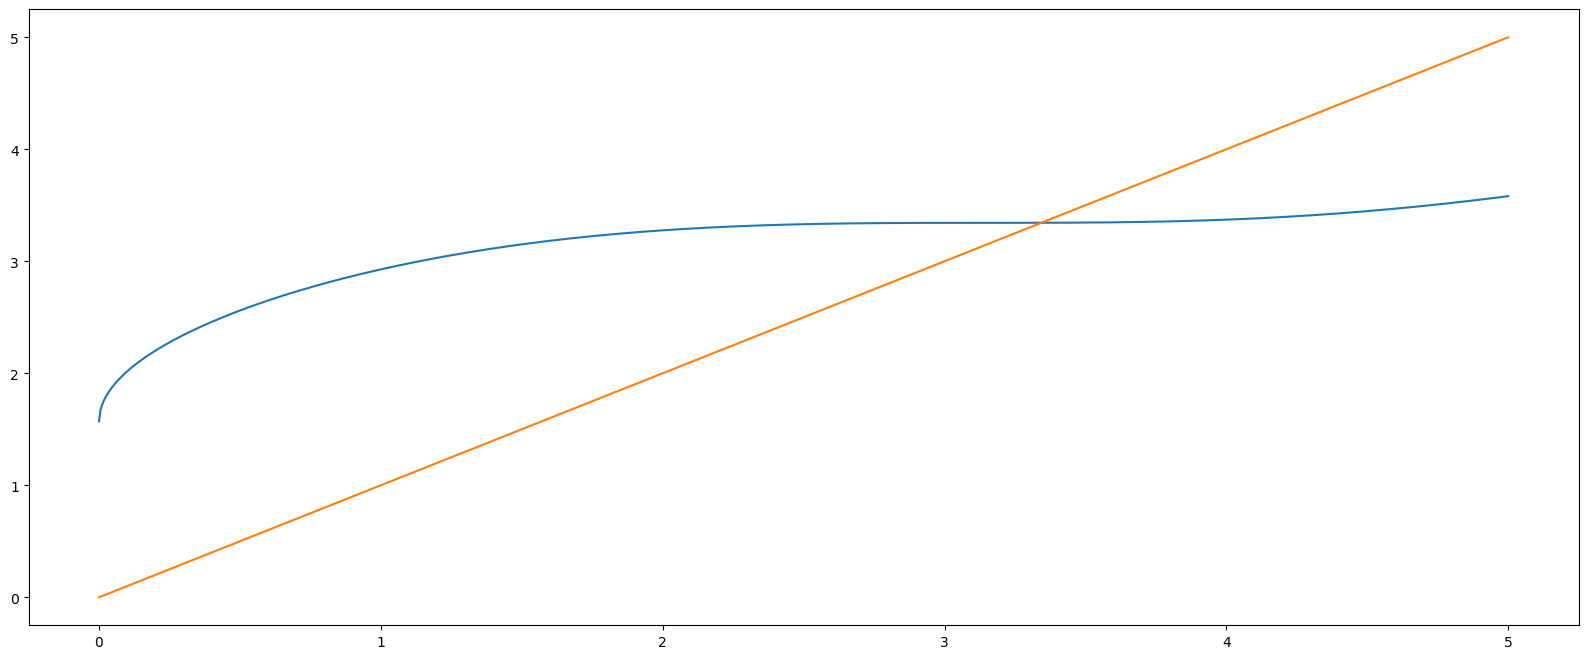

In [6]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 5, 1000)
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(x, g(x))
ax.plot(x, x)
plt.show()

# Ejercicio 2

In [8]:

E, h, v, a, b, F = 200, 5, 0.3, 2, 3, 150
f = lambda x: ((E*h**3)/(12*(1 - v**2)))*(1/(x - a)**2 + 1/(x - b)**2)-F
df= lambda x: ((E*h**3)/(6*(1 - v**2)))*(1/(a - x)**3 + 1/(b - x)**3)
metodo_newton_raphson(f, df, 1, verbose=True)

ite:0, p_0:1.000000000
ite:1, p_1:0.473564444
ite:2, p_2:-0.284542214
ite:3, p_3:-1.260435086
ite:4, p_4:-2.261343919
ite:5, p_5:-2.910033725
ite:6, p_6:-3.082661262
ite:7, p_7:-3.091676460
ite:8, p_8:-3.091699055


-3.091699054951376

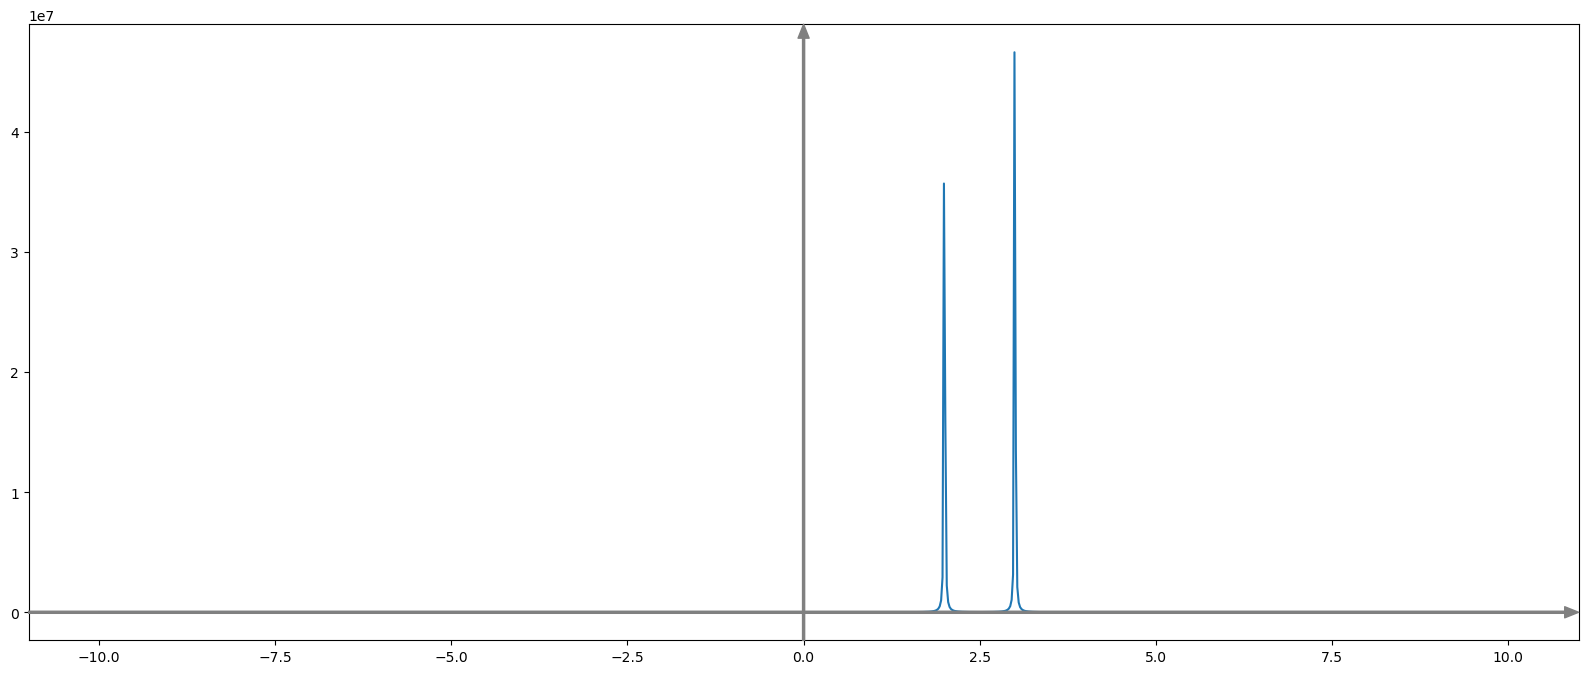

In [9]:
f = lambda x: ((E*h**3)/(12*(1 - v**2)))*(1/(x - a)**2 + 1/(x - b)**2)-F
graficar(f, -10, 10)

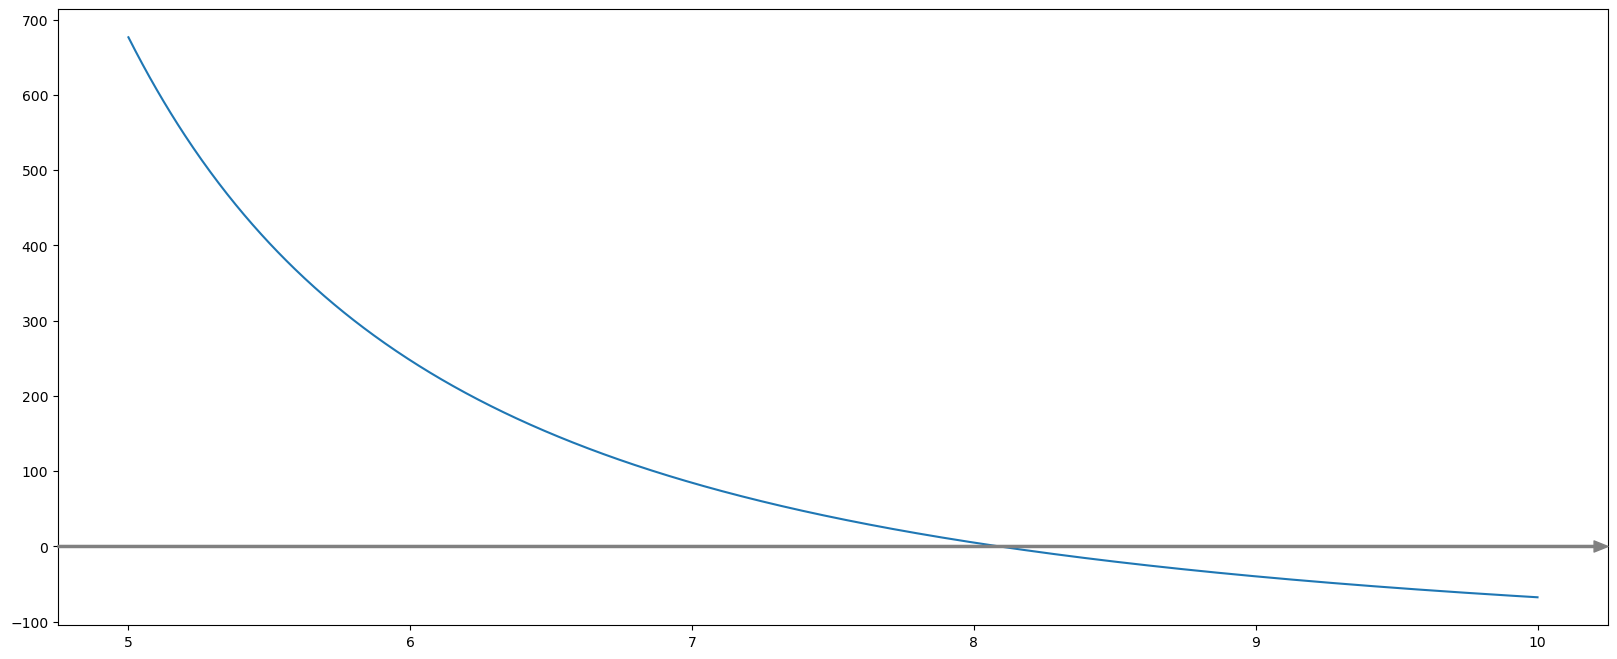

In [13]:
graficar(f, 5, 10)

In [14]:
E, h, v, a, b, F = 200, 5, 0.3, 2, 3, 150
f = lambda x: ((E*h**3)/(12*(1 - v**2)))*(1/(x - a)**2 + 1/(x - b)**2)-F
df= lambda x: ((E*h**3)/(6*(1 - v**2)))*(1/(a - x)**3 + 1/(b - x)**3)
metodo_newton_raphson(f, df, 10, verbose=True)

ite:0, p_0:10.000000000
ite:1, p_1:6.971719111
ite:2, p_2:7.766989978
ite:3, p_3:8.063066758
ite:4, p_4:8.091472535
ite:5, p_5:8.091699041
ite:6, p_6:8.091699055


8.091699055092677

# Ejercicio 3

In [15]:
poli_carac = lambda x: -1 + np.sqrt(5) + np.sqrt(6) + np.sqrt(15) + np.sqrt(21) + 2*np.sqrt(42) + 2*x + 2*np.sqrt(7)*x - np.sqrt(21)*x - 2*np.sqrt(42)*x - np.sqrt(5)*x**2 - np.sqrt(6)*x**2 - 3*np.sqrt(7)*x**2 - np.sqrt(15)*x**2 - 2*x**3 + np.sqrt(7)*x**3 + x**4
dpoli_carac = lambda x: 2 + 2*np.sqrt(7) - np.sqrt(21) - 2*np.sqrt(42) - 2*np.sqrt(5)*x - 2*np.sqrt(6)*x - 6*np.sqrt(7)*x - 2*np.sqrt(15)*x - 6*x**2 + 3*np.sqrt(7)*x**2 + 4*x**3

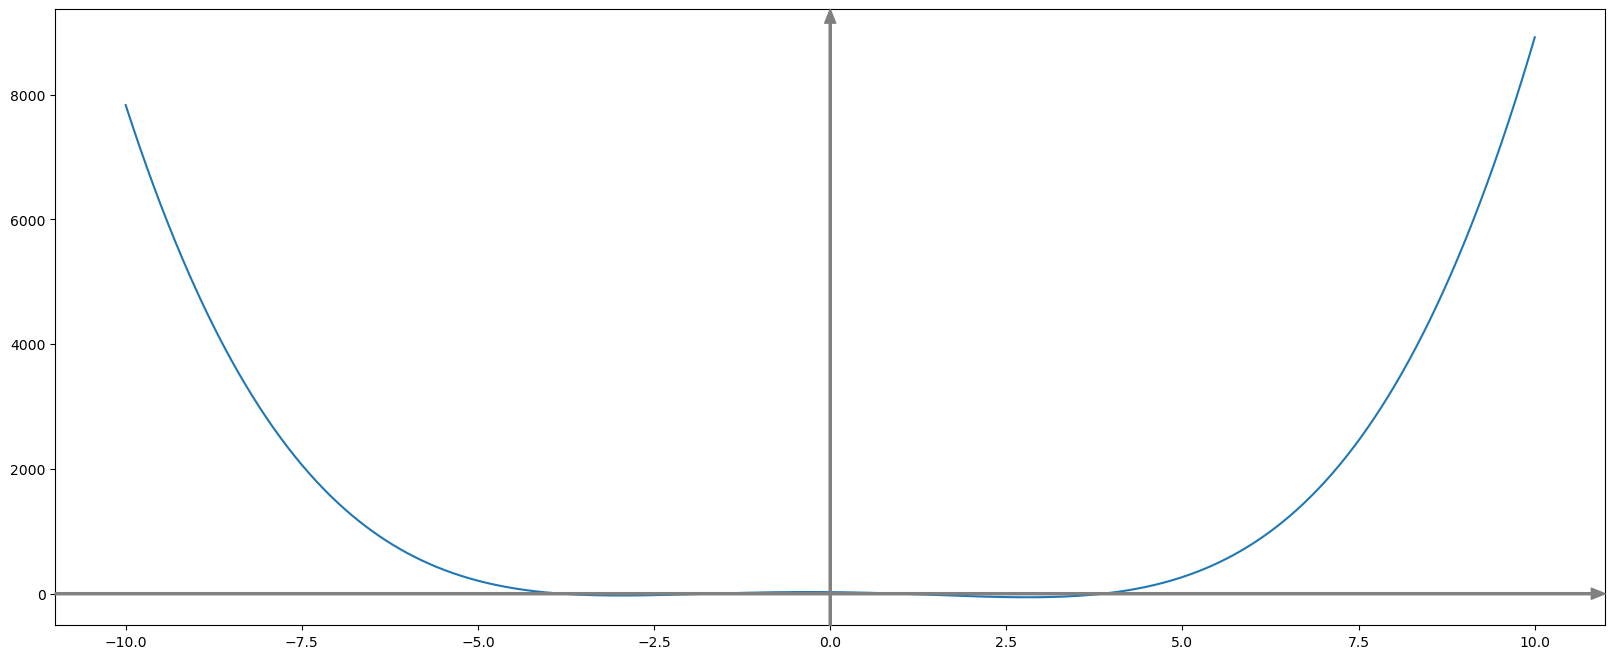

In [16]:
graficar(poli_carac, -10, 10)

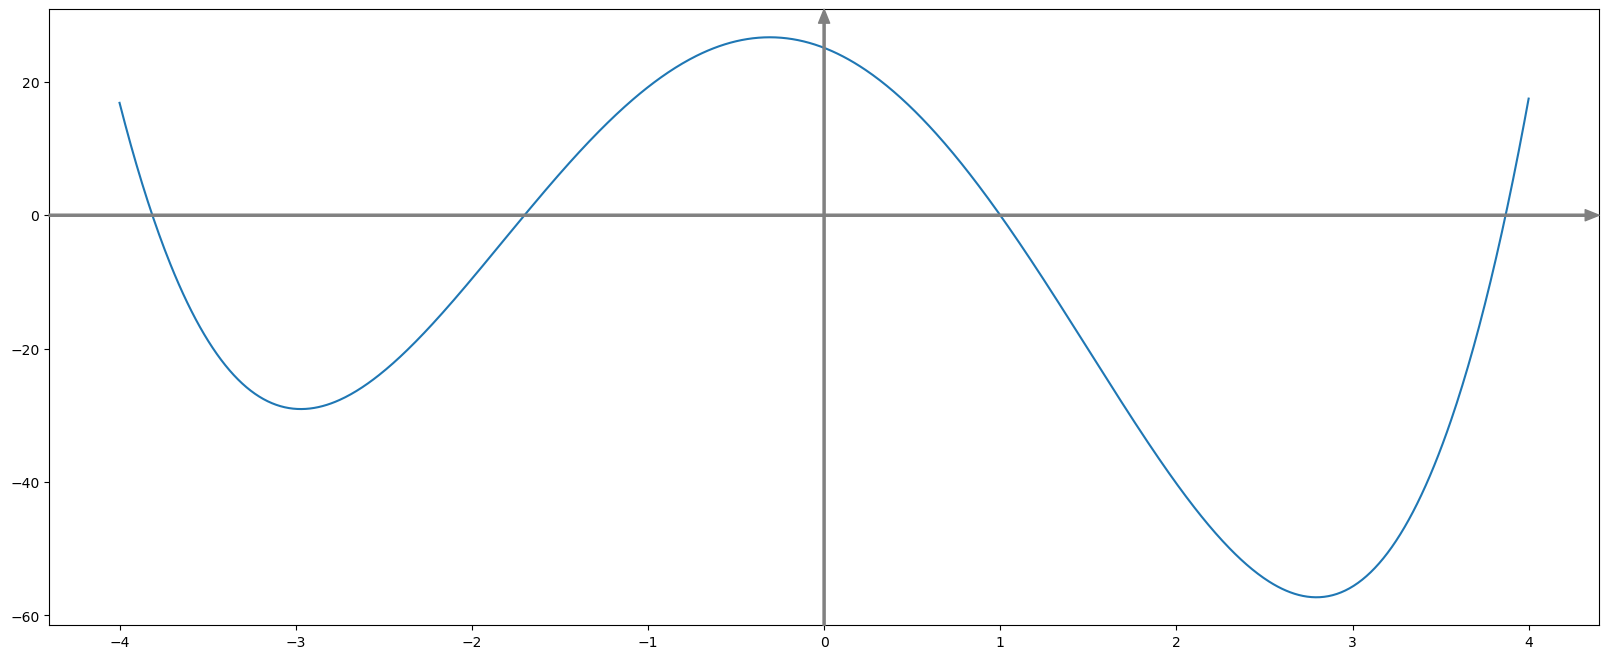

In [17]:
graficar(poli_carac, -4, 4)

In [18]:
metodo_newton_raphson(poli_carac, dpoli_carac, -4, tol=1e-5)
metodo_newton_raphson(poli_carac, dpoli_carac, -2, tol=1e-5)
metodo_newton_raphson(poli_carac, dpoli_carac, 1, tol=1e-5)
metodo_newton_raphson(poli_carac, dpoli_carac, 3, tol=1e-5)

Solución aproximada encontrada: -3.813681556813602
número de iteraciones: 4
Solución aproximada encontrada: -1.701215029567622
número de iteraciones: 3
Solución aproximada encontrada: 1.0
número de iteraciones: 1
Solución aproximada encontrada: 3.8691452753164546
número de iteraciones: 8


3.8691452753164546

In [21]:
from IPython.display import display, Math
f_latex = r"\frac{E h^{3}}{12 (1-v^{2}) }\left ( \frac{1}{\left ( x-a \right )^{2}} + \frac{1}{\left ( x-b \right )^{2}} \right )"
display(Math(f_latex))

<IPython.core.display.Math object>